In [1]:
%load_ext autoreload
%autoreload 2
!RUST_BACKTRACE=1 cargo run -- ../models/bouncing_ball.mo -t ../templates/sympy.jinja > bouncing_ball.py

    Finished `dev` profile [unoptimized + debuginfo] target(s) in 0.11s
     Running `/home/jgoppert/git/rumoca/target/debug/rumoca ../models/bouncing_ball.mo -t ../templates/sympy.jinja`


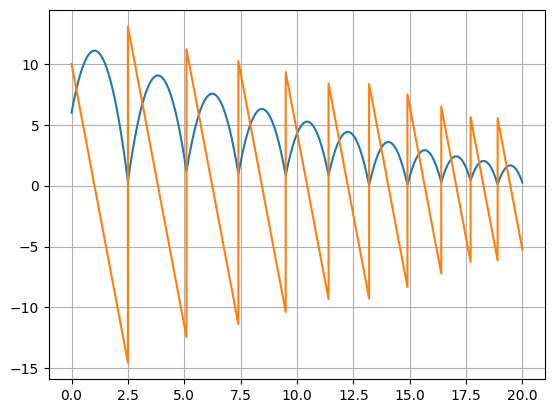

In [2]:
import bouncing_ball
import numpy as np
import matplotlib.pyplot as plt

model = bouncing_ball.Model()
model.solve()
model.x0['h'] = 6
model.x0['v'] = 10
model.p0['e'] = 0.9
res = model.simulate(t0=0, tf=20, dt=0.1)
plt.plot(res['t'], res['x'].T)
plt.grid()